# Task 2: Exploratory Data Analysis (EDA)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [41]:
# Load the labeled dataset
df = pd.read_csv("test_labeled.csv")
df.head()

,Subject,body,date,from,sentiment
0,EnronOptions Update!,enronoptions announcement we have updated the ...,2010-05-10,sally.beck@enron.com,Neutral
1,(No Subject),marc unfortunately today is not going to work ...,2010-07-29,eric.bass@enron.com,Neutral
2,Phone Screen Interview - Shannon L. Burnham,when wednesday june 06 2001 10 00 am 11 00 am ...,2011-07-25,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos we can meet somewhe...,2010-03-25,johnny.palmer@enron.com,Neutral
4,Bet,since you never gave me the 20 for the last ti...,2011-05-21,lydia.delgado@enron.com,Neutral


### Basic data info

In [42]:
# Number of records, data types, missing values
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2156 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB
None


In [43]:
# Summary statistics
print(df.describe()) 

             Subject                                               body  \
count           2191                                               2156   
unique          1251                                               1503   
top     (No Subject)  attached please find the following documents t...   
freq             141                                                 15   

              date                     from sentiment  
count         2191                     2191      2191  
unique         690                       10         3  
top     2011-07-01  lydia.delgado@enron.com   Neutral  
freq             9                      284      2163  


In [44]:
 # Count of missing values per column
missing_summary = df.isnull().sum()
print("Missing values:\n", missing_summary)

Missing values:
 Subject       0
body         35
date          0
from          0
sentiment     0
dtype: int64


In [45]:
# drop nans or null values from body feature
df = df.dropna(subset=["body"])

In [46]:
# Check for duplicate records
print(df.duplicated().sum())

0


### Sentiment Distribution Visualization

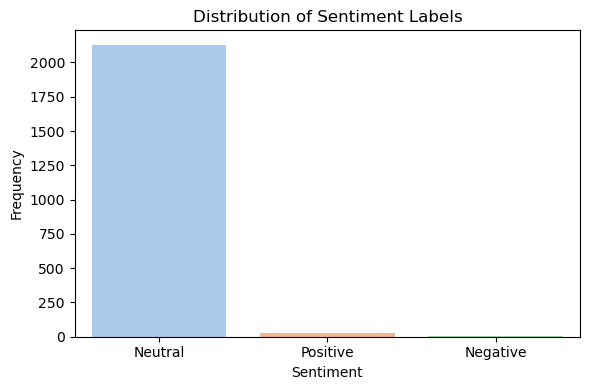

sentiment
Neutral     2128
Positive      26
Negative       2
Name: count, dtype: int64


In [47]:
# Plot sentiment counts
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Display proportions of positive and negative sentiments
print(df['sentiment'].value_counts())

### Analysing trends over time.

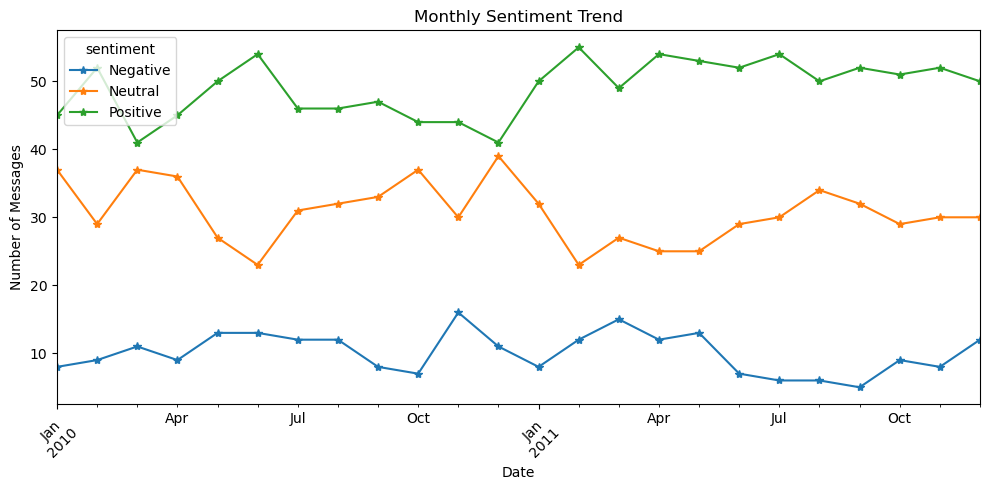

<Figure size 640x480 with 0 Axes>

In [36]:
# Convert date column into datetime
df['date'] = pd.to_datetime(df['date'])

# Group by date and sentiment
sentiment_trend = df.groupby([df['date'].dt.to_period('M'), 'sentiment']).size().unstack().fillna(0)

# Plot trends over time
sentiment_trend.plot(kind='line', figsize=(10,5), marker='*')
plt.title("Monthly Sentiment Trend")
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("Monthly sentiment trend.png")

### Identifying Patterns & Anomalies into employees engagements

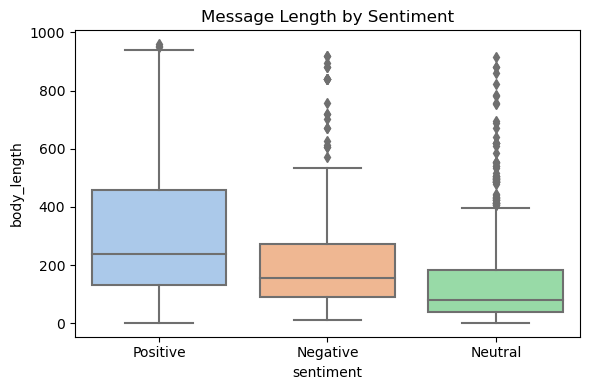

<Figure size 640x480 with 0 Axes>

In [37]:
# Obtain the length for each message
df["body_length"] = df["body"].str.len()

# Boxplot by sentiment
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="sentiment", y="body_length", palette="pastel")
plt.title("Message Length by Sentiment")
plt.tight_layout()
plt.show()
plt.savefig("Message_length.png")

# Exporting sentiment counts
df['sentiment'].value_counts().to_csv("sentiment_distribution.csv")

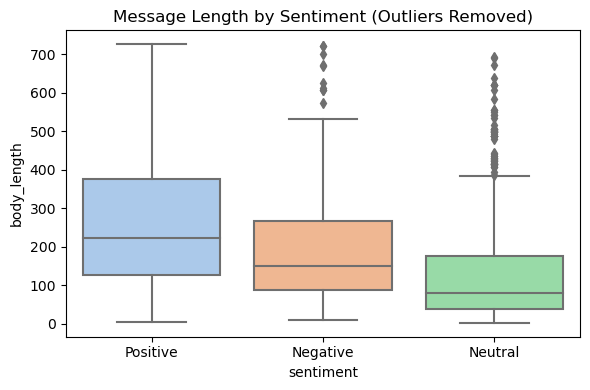

In [38]:
# Ensure message length column exists

# Remove outliers using IQR
Q1 = df["body_length"].quantile(0.25)
Q3 = df["body_length"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_filtered = df[(df["body_length"] >= lower_bound) & (df["body_length"] <= upper_bound)]

# Plot without outliers
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_filtered, x="sentiment", y="body_length", palette="pastel")
plt.title("Message Length by Sentiment (Outliers Removed)")
plt.tight_layout()

# Rename the outlier filtered dataset
df = df_filtered

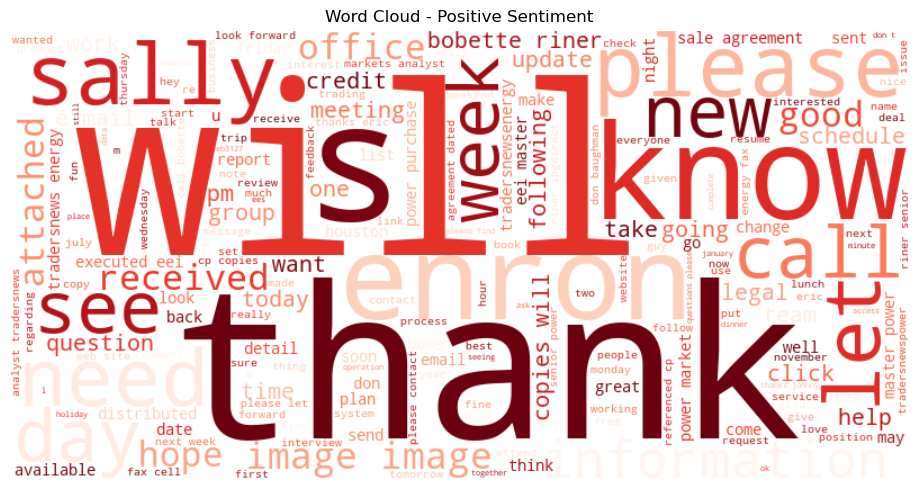

In [39]:
# word cloud for positive messages
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['body'].dropna().astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.tight_layout()
plt.show()

In [40]:
# Save updated dataset
df.to_csv("test_labeled_1.csv", index=False)
print("Sentiment labeling complete. Saved as test_labeled_1.csv.")

Sentiment labeling complete. Saved as test_labeled_1.csv.
